In [18]:
import cv2
import numpy as np
import tensorflow as tf
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from dotenv import load_dotenv
from os import environ as env


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
dataset_train = "/content/drive/MyDrive/17flowers/train"
dataset_test = "/content/drive/MyDrive/17flowers/test"

In [51]:
#Augmentation  --> im
img_data_generator = ImageDataGenerator(
    rescale=1./255,           #normalization - divide each pixels into 255
    validation_split=0.2,
)


train_dataset = img_data_generator.flow_from_directory(
    dataset_train,
    shuffle=True,
    #save_to_dir="/content/drive/MyDrive/aug" ,
    subset="training",
    target_size=(224,224)
)

validation_dataset = img_data_generator.flow_from_directory(
    dataset_test,
    shuffle=True,
    subset="validation",
    target_size=(224,224)
)

Found 823 images belonging to 17 classes.
Found 65 images belonging to 17 classes.


In [52]:
model = tf.keras.models.Sequential([
    # stride = number of pixels movement in hovering kernel = گام حرکت
    #Feature Extraction
    tf.keras.layers.Conv2D( filters=64 , kernel_size=(3,3) , strides=(2,2) , activation="relu", padding="same" , input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D( filters=128 , kernel_size=(3,3) , strides=(1,1) , activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D( filters=256 , kernel_size=(3,3) , strides=(1,1) , activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(),


    # Feature Array
    tf.keras.layers.Flatten(),

    #tf.keras.layers.Dense(4096 , activation="relu"),
    tf.keras.layers.Dense(512 , activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(17    , activation="softmax")
    ])

In [53]:
model.compile(optimizer= tf.keras.optimizers.Nadam() , loss= tf.keras.losses.categorical_crossentropy , metrics="accuracy")

# train_dataset contains x_train & y_train
history = model.fit( train_dataset , validation_data=validation_dataset , epochs=30 )
# train and evaluation in parallel mode



Epoch 1/30
26/26 [==============================] - 10s 299ms/step - loss: 2.6972 - accuracy: 0.1215 - val_loss: 2.2037 - val_accuracy: 0.3385
Epoch 2/30
26/26 [==============================] - 6s 239ms/step - loss: 2.0516 - accuracy: 0.3366 - val_loss: 1.6646 - val_accuracy: 0.4462
Epoch 3/30
26/26 [==============================] - 8s 280ms/step - loss: 1.5076 - accuracy: 0.5030 - val_loss: 1.3959 - val_accuracy: 0.5385
Epoch 4/30
26/26 [==============================] - 5s 178ms/step - loss: 1.0977 - accuracy: 0.6063 - val_loss: 1.2557 - val_accuracy: 0.5692
Epoch 5/30
26/26 [==============================] - 6s 222ms/step - loss: 0.7329 - accuracy: 0.7473 - val_loss: 1.3288 - val_accuracy: 0.6462
Epoch 6/30
26/26 [==============================] - 5s 181ms/step - loss: 0.5212 - accuracy: 0.8250 - val_loss: 1.3028 - val_accuracy: 0.6615
Epoch 7/30
26/26 [==============================] - 4s 152ms/step - loss: 0.3053 - accuracy: 0.8943 - val_loss: 1.5970 - val_accuracy: 0.6615
Epoch

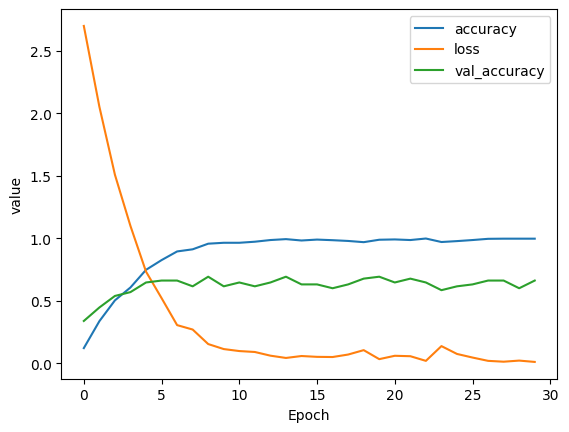

In [80]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_accuracy"])
plt.legend(["accuracy","loss" , "val_accuracy" , "val_loss"])
plt.xlabel("Epoch")
plt.ylabel("value")
plt.show()

In [55]:
model.save("/content/weights.h5")
model.save("/content/weights.keras")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [56]:
loss , accuracy = model.evaluate(validation_dataset)
loss , accuracy

3/3 [==============================] - 0s 78ms/step - loss: 2.6746 - accuracy: 0.6615


(2.6746411323547363, 0.6615384817123413)

In [58]:
ypred = model.predict(validation_dataset)


3/3 [==============================] - 0s 84ms/step


In [59]:
ypred.shape

(65, 17)

In [60]:
ypred_list = []
for i in range(65) :
    ypred_list.append(np.argmax(ypred[i]))
np.array(ypred_list)


array([ 8, 10,  3, 13, 13, 11, 15,  4,  9,  0,  8, 10,  6,  1,  1, 16, 11,
       16,  0, 13,  7,  5, 16,  5,  5,  0,  9,  8, 12, 14,  1,  9, 14,  7,
        9,  1,  7,  8,  1,  7,  2, 14,  1,  3,  8,  5,  9, 10,  5, 16, 11,
        1,  4, 16,  1,  4,  2, 12,  8,  5, 12,  4,  9,  4,  6])

In [61]:
validation_dataset.labels

array([ 0,  0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  3,  4,
        4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  7,  8,  8,
        8,  8,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12,
       13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16],
      dtype=int32)

In [ ]:
images,labels = validation_dataset[0]
ypred_list = []
for image in images:
    image = np.expand_dims(image, axis=0)
    ypred=model.predict(image)
    ypred_list.append(np.argmax(ypred))


In [63]:
validation_dataset.batch_size

32

In [64]:
ytrue_list = []
for label in labels:
    ytrue_list.append(np.argmax(label))
np.array(ytrue_list)

array([12,  9,  8,  6, 14, 16,  8, 14, 10,  2, 10,  2, 16, 13,  0,  5, 11,
       15,  7, 15,  3,  9,  7,  8, 14, 11, 12,  9,  1,  4,  7,  2])

In [65]:
np.array(ytrue_list).shape

(32,)

In [66]:
np.array(ypred_list)

array([10,  9,  8,  4,  8, 16,  8, 14, 12,  2,  8,  7, 16, 13,  0,  1, 11,
        5,  1,  1, 15,  9,  7, 12, 14, 11, 12,  9,  1,  4,  7,  2])

In [67]:
confm = confusion_matrix(y_true= ytrue_list , y_pred= ypred_list )
confm

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

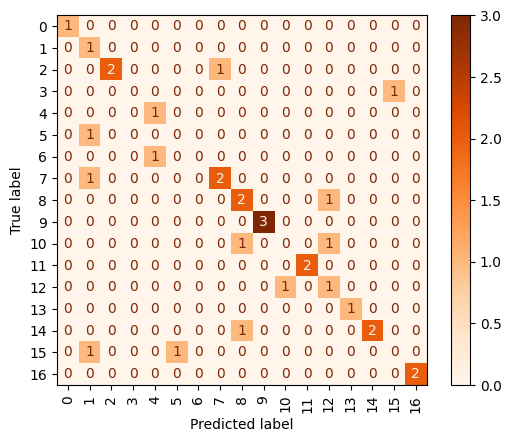

In [68]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confm )
cm_display.plot(cmap=plt.cm.Oranges , xticks_rotation="vertical")
plt.show()

## Inference

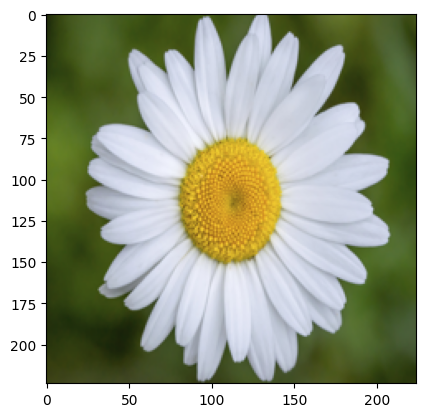

In [77]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
image = Image.open("/content/da.jpg")
new_image = image.resize((224,224))
new_image.save("/content/image.jpg")
plt.imshow(new_image)

In [78]:
new_image = cv2.imread("/content/image.jpg" , 0)
new_image = cv2.cvtColor(new_image , cv2.COLOR_BGR2RGB)
print(new_image.shape)
img = np.reshape(new_image, [1, 224, 224, 3])
print(img.shape)
output = model.predict(img)

predicted_class = np.argmax(output)
print(predicted_class)
print(train_dataset.class_indices)
print(np.argmax(output))
mylist = list(train_dataset.class_indices)
print("predicted label : " , mylist[np.argmax(output)])


(224, 224, 3)
(1, 224, 224, 3)
1/1 [==============================] - 0s 78ms/step
16
{'bluebell': 0, 'buttercup': 1, 'coltsfoot': 2, 'cowslip': 3, 'crocus': 4, 'daffodil': 5, 'daisy': 6, 'dandelion': 7, 'fritillary': 8, 'iris': 9, 'lilyvalley': 10, 'pansy': 11, 'snowdrop': 12, 'sunflower': 13, 'tigerlily': 14, 'tulip': 15, 'windflower': 16}
16
predicted label :  windflower


In [79]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

model = load_model("/content/weights.keras")
output = model.predict(img)

predicted_class = np.argmax(output)
# print(output)
print(predicted_class)
print(train_dataset.class_indices)
# print(train_dataset.classes)
print(np.argmax(output))
mylist = list(train_dataset.class_indices)
print("predicted label : " , mylist[np.argmax(output)])


1/1 [==============================] - 0s 78ms/step
16
{'bluebell': 0, 'buttercup': 1, 'coltsfoot': 2, 'cowslip': 3, 'crocus': 4, 'daffodil': 5, 'daisy': 6, 'dandelion': 7, 'fritillary': 8, 'iris': 9, 'lilyvalley': 10, 'pansy': 11, 'snowdrop': 12, 'sunflower': 13, 'tigerlily': 14, 'tulip': 15, 'windflower': 16}
16
predicted label :  windflower
